# Summarization year 2005-2012

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
pd.options.display.max_columns = 999
%matplotlib inline
pd.options.display.max_columns=200
matplotlib.rcParams['figure.figsize'] = (15.0, 12.0)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the data inside:
loan2005 = pd.read_csv('./processed/summary_2005.csv')
loan2006 = pd.read_csv('./processed/summary_2006.csv')
loan2007 = pd.read_csv('./processed/summary_2007.csv')
loan2008 = pd.read_csv('./processed/summary_2008.csv')
loan2009 = pd.read_csv('./processed/summary_2009.csv')
loan2010 = pd.read_csv('./processed/summary_2010.csv')
loan2011 = pd.read_csv('./processed/summary_2011.csv')
loan2012 = pd.read_csv('./processed/summary_2012.csv')

### Let's look at data

In [4]:
#creating dictionary for all years
loan = {'2005':loan2005,'2006':loan2006,'2007':loan2007, '2008': loan2008, '2009': loan2009,'2010': loan2010,'2011': loan2011,'2012': loan2012}

In [5]:
years = []
prepaid = {}
default = {}
loan_num = {}

for key in loan.keys():
    temp_size =len(loan[key])
    temp_count = loan[key].groupby('ZERO_BALANCE_CODE')['LOAN_SEQUENCE_NUMBER'].count()
    #print(temp_size)
    loan_num[key] = temp_size
    prepaid[key] = temp_count[1]/temp_size
    default[key] = 1 - sum(temp_count[0:2])/temp_size


### How many morgages have been prepaid in these years?

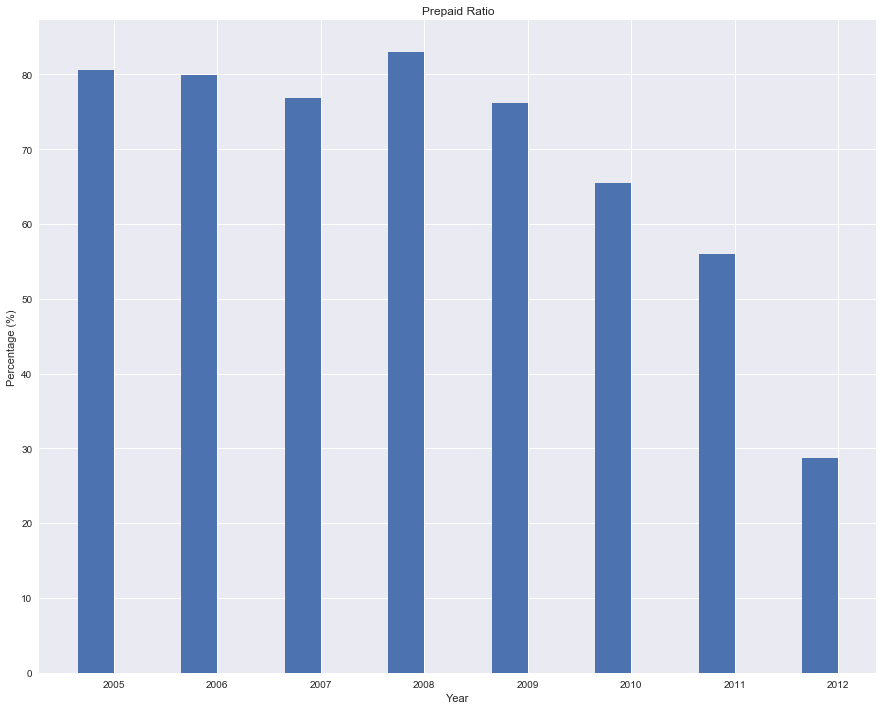

In [6]:
def plot_dict_bar(val_dict):
    x_axis = sorted(list(val_dict.keys()))
    y_axis = [val_dict[key] for key in x_axis]
    x = np.arange(8) - 0.175
    y = np.array(y_axis)*100
    fig, ax  = plt.subplots()
    ax.bar(x,y,0.35)
    ax.set_xticks(np.arange(8))
    ax.set_xticklabels(x_axis)
    ax.set_xlabel("Year")
    ax.set_ylabel("Percentage (%)")
    ax.set_title("Prepaid Ratio")
    plt.show()
    
plot_dict_bar(prepaid)

 #The prepaid ratio is lower in 2007 due to economic depression. #https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008

###### Default Rate? 
#zero_balance_code vales 3, 9 and 6

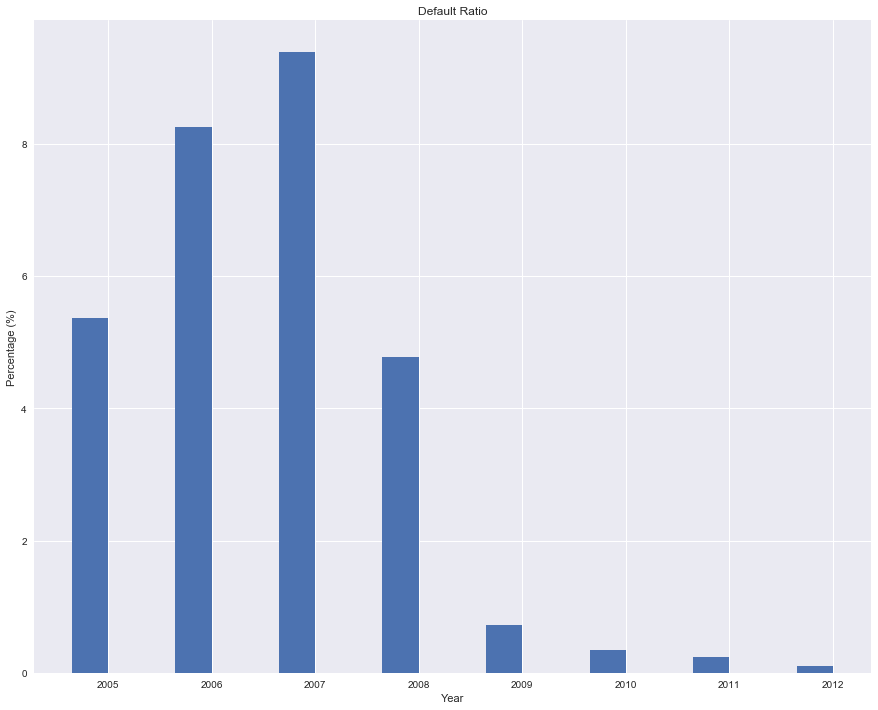

In [7]:
def plot_dict_bar(val_dict):
    x_axis = sorted(list(val_dict.keys()))
    y_axis = [val_dict[key] for key in x_axis]
    x = np.arange(8) - 0.175
    y = np.array(y_axis)*100
    fig, ax  = plt.subplots()
    ax.bar(x,y,0.35)
    ax.set_xticks(np.arange(8))
    ax.set_xticklabels(x_axis)
    ax.set_xlabel("Year")
    ax.set_ylabel("Percentage (%)")
    ax.set_title("Default Ratio")
    plt.show()
    
plot_dict_bar(default)

'''Default rate is very high in 2007 due to economic recession due to subprime lending. More details on https://en.wikipedia.org/wiki/United_States_housing_bubble '''

In [8]:
years = []
loan_to_value = {}

for key in loan.keys():
    temp_ltv = {}
    temp_mean = loan[key].groupby('ZERO_BALANCE_CODE')['ORIGINAL_LOAN_TO_VALUE'].mean()
    temp_ltv['Current'] = temp_mean[0]
    temp_ltv['Prepaid'] = temp_mean[1]
    temp_ltv['Default'] = np.mean(temp_mean[2:])
    loan_to_value[key] = temp_ltv

result = pd.DataFrame.from_dict(loan_to_value)
result.head()

,2005,2006,2007,2008,2009,2010,2011,2012
Current,70.340034,71.572202,72.962060,71.072662,66.086471,66.637455,67.063653,67.849075
Default,77.636076,78.092807,81.194591,79.293714,74.904306,73.734928,74.923166,78.650926
Prepaid,68.681565,69.749956,70.791921,69.635895,65.164579,66.175585,67.669442,68.155163


It is very interesting to find out that "default" loans tends to have slightly higher original-loan-to-value (OLTV) ratio on average, meaning they tends to have lower downpayment.

In [9]:
years = []
credit_score = {}

for key in loan.keys():
    temp_cscore = {}
    loan[key]['CREDIT_SCORE']=loan[key]['CREDIT_SCORE'].convert_objects(convert_numeric=True)
    temp_mean = loan[key].groupby('ZERO_BALANCE_CODE')['CREDIT_SCORE'].mean()
    temp_cscore['Current'] = temp_mean[0]
    temp_cscore['Prepaid'] = temp_mean[1]
    temp_cscore['Default'] = np.mean(temp_mean[2:])
    credit_score[key] = temp_cscore

result2 = pd.DataFrame.from_dict(credit_score)
result2.head()

,2005,2006,2007,2008,2009,2010,2011,2012
Current,707.196319,699.357929,698.345940,718.774209,756.823855,760.477886,762.172374,766.669459
Default,689.307503,688.914632,688.520338,701.694752,725.992505,735.517065,733.797867,751.500000
Prepaid,728.963012,729.245342,731.388331,746.393766,764.107736,764.583181,765.212708,766.265150


Again, it is very interesting to find that default loans tend to have slightly lower credit score, on average.

In [10]:
# Last one, default by states...
years = []
state_res = {}

for key in loan.keys():
    temp_state_count = loan[key][(loan[key]['ZERO_BALANCE_CODE'] == 3) | (loan[key]['ZERO_BALANCE_CODE'] == 6) | (loan[key]['ZERO_BALANCE_CODE'] == 9)].groupby('PROPERTY_STATE')['LOAN_SEQUENCE_NUMBER'].count()
    
    states = list(temp_state_count.index)
    
    for state in states:
        if state_res.get(state) == None:
            state_res[state] = temp_state_count[state]
        else:
            state_res[state] = state_res[state] + temp_state_count[state]
    

total_state_res = pd.DataFrame.from_dict(state_res, orient='index')

total_state_res.columns=['Default']

In [108]:
total_state_res.sort_values(by='Default', ascending=False)


,Default
FL,2293
CA,1602
AZ,1012
IL,881
MI,745
GA,655
OH,448
NV,429
TX,387
MN,358


#FL and CA  tend to have more default cases over all these years